# Project: Web Page Phishing Detection using Machine Learning


Goal: The goal of this project is to develop a machine learning-based system that can automatically detect phishing websites by analyzing their features, thereby enhancing cybersecurity and protecting users from fraudulent online activities.

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Exploration

In [7]:
data = pd.read_csv('web-page-phishing.csv')
data.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
data.shape

(100077, 20)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [13]:
data.isna().sum()

,0
url_length,0
n_dots,0
n_hypens,0
n_underline,0
n_slash,0
n_questionmark,0
n_equal,0
n_at,0
n_and,0
n_exclamation,0


In [14]:
data.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


### Distribution of Phishing vs Legitimate Websites

In [15]:
data['phishing'].map({0: "non-phishing", 1: "phishing"}).value_counts()


,count
phishing,
non-phishing,63715
phishing,36362


### Data Visualization

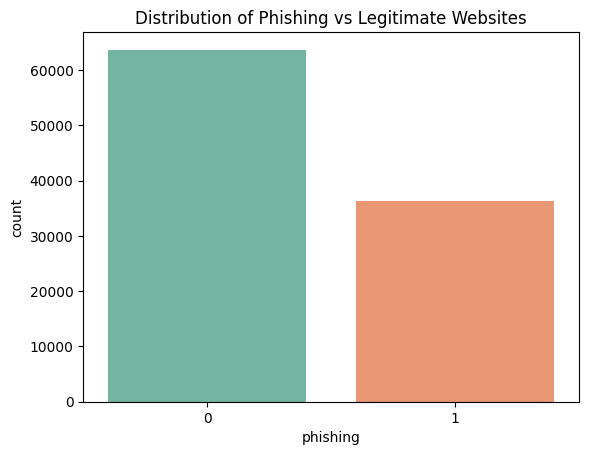

In [16]:
sns.countplot(x='phishing', data=data, palette="Set2")
plt.title("Distribution of Phishing vs Legitimate Websites")
plt.show()

### Correlation Heatmap
The heatmap visualizes the correlation matrix of the features, highlighting the relationships between different variables. This helps in identifying highly correlated features, which might be considered for dimensionality reduction or feature selection.


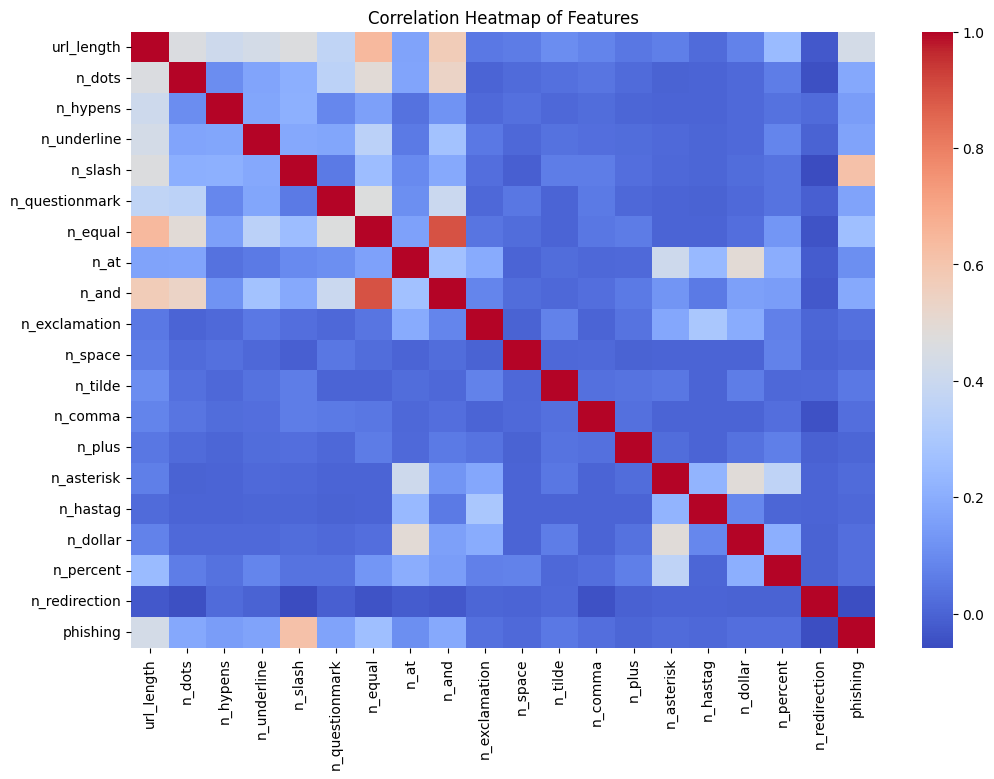

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

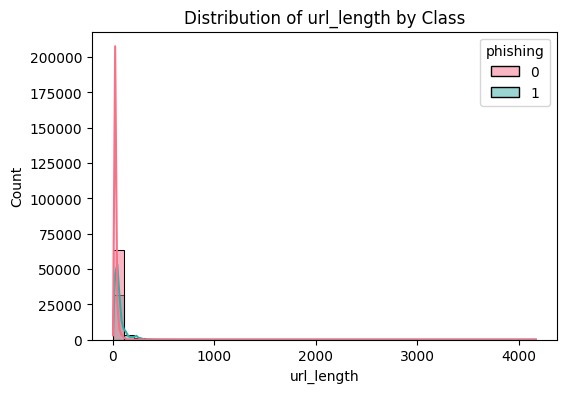

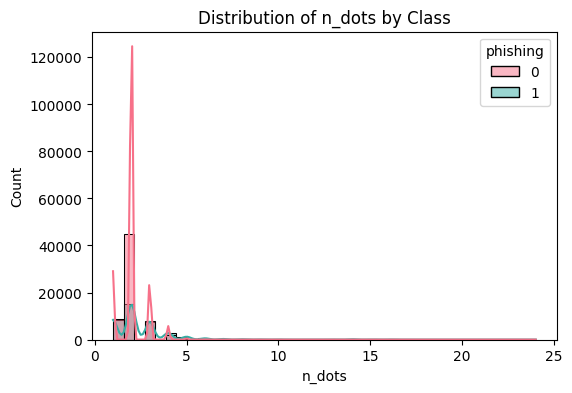

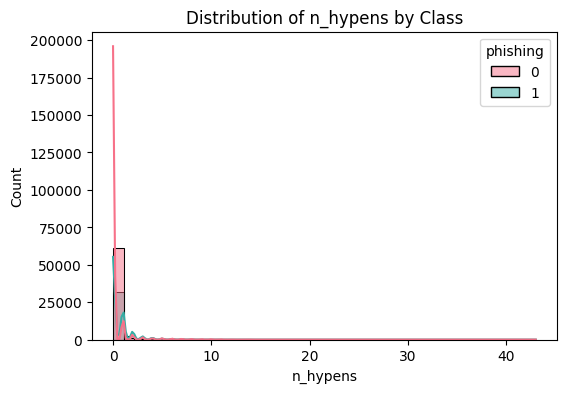

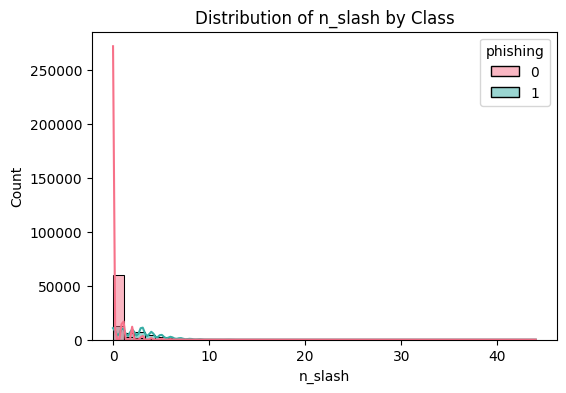

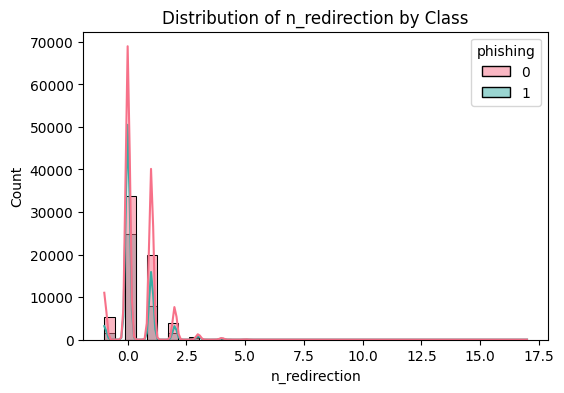

In [19]:
features = ['url_length','n_dots','n_hypens','n_slash','n_redirection']
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, hue="phishing", kde=True, bins=40, palette="husl")
    plt.title(f"Distribution of {col} by Class")
    plt.show()

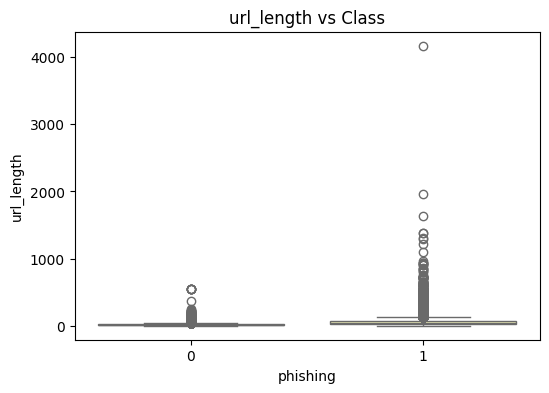

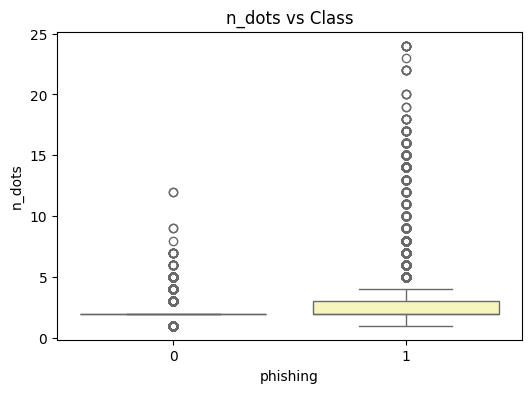

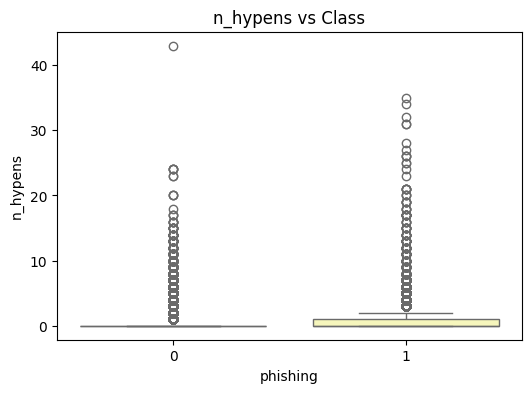

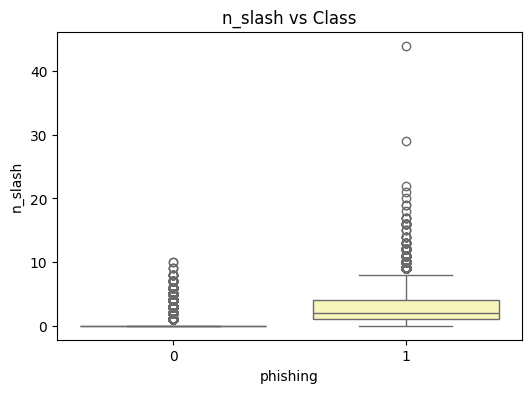

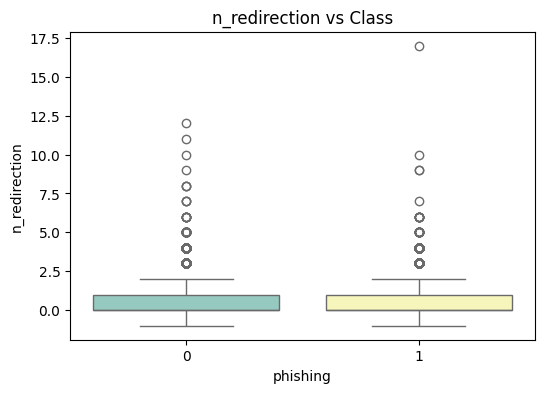

In [20]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='phishing', y=col, data=data, palette="Set3")
    plt.title(f"{col} vs Class")
    plt.show()

Most phishing sites (blue points = class 1) cluster tightly, but there’s overlap with legitimate (red points = class 0).

Some phishing samples extend further out (outliers), showing unusual feature values.

PCA alone doesn’t give perfect separation, but it’s useful for detecting patterns and overlaps.

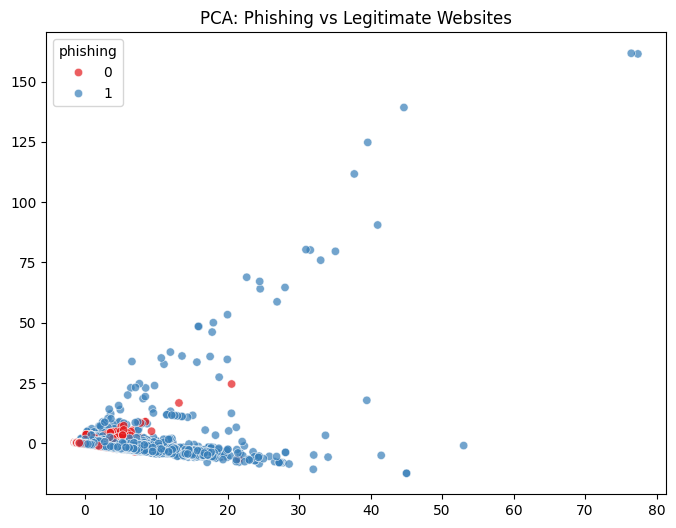

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = data.drop('phishing', axis=1)
y = data['phishing']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y, palette="Set1", alpha=0.7)
plt.title("PCA: Phishing vs Legitimate Websites")
plt.show()

In [22]:
data_cleaned = data.dropna(subset=['phishing'])
X = data_cleaned.drop('phishing', axis=1)
y = data_cleaned['phishing']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Final Model Evaluation

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')

}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))



Logistic Regression
Accuracy: 0.8562649880095923

Random Forest
Accuracy: 0.8909372501998402

XGBoost
Accuracy: 0.8917865707434053


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(f"\n{name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Logistic Regression
Confusion Matrix:
 [[11935   808]
 [ 2069  5204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     12743
           1       0.87      0.72      0.78      7273

    accuracy                           0.86     20016
   macro avg       0.86      0.83      0.84     20016
weighted avg       0.86      0.86      0.85     20016

ROC-AUC: 0.9306707848294816

Random Forest
Confusion Matrix:
 [[11779   964]
 [ 1232  6041]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     12743
           1       0.86      0.83      0.85      7273

    accuracy                           0.89     20016
   macro avg       0.88      0.88      0.88     20016
weighted avg       0.89      0.89      0.89     20016

ROC-AUC: 0.954718301787296

XGBoost
Confusion Matrix:
 [[11717  1026]
 [ 1140  6133]]
Classification Report:
               precision 

In [32]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} CV Mean Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression CV Mean Accuracy: 0.8524 ± 0.0516
Random Forest CV Mean Accuracy: 0.8744 ± 0.0706
XGBoost CV Mean Accuracy: 0.8758 ± 0.0679


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest tuning
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring="accuracy", n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF Score:", grid_rf.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Score: 0.8957669776795193


## Final model evaluation

Evaluate the best performing model (XGBoost) using a confusion matrix, classification report, and ROC-AUC score to provide a comprehensive understanding of its performance.


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_model = models["XGBoost"]

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("XGBoost Model Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

XGBoost Model Evaluation:
Confusion Matrix:
 [[11717  1026]
 [ 1140  6133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     12743
           1       0.86      0.84      0.85      7273

    accuracy                           0.89     20016
   macro avg       0.88      0.88      0.88     20016
weighted avg       0.89      0.89      0.89     20016

ROC-AUC: 0.9607599609662679


### Project Summary
This project aimed to develop a machine learning model to detect phishing websites based on URL features.
We performed data exploration, including examining the distribution of features and the target variable, checking for missing values, and visualizing correlations.
We trained and evaluated three different models: Logistic Regression, Random Forest, and XGBoost.
Based on the initial evaluation using accuracy on the test set, the XGBoost model achieved the highest accuracy of approximately 89.18%.
Potential next steps include:
- Further hyperparameter tuning for the best-performing models.
- Exploring feature engineering techniques to create new relevant features.
- Investigating more advanced methods for handling outliers and potential class imbalance.
- Trying other advanced models such as neural networks.
- Deploying the best model for real-time phishing detection.

### Data Analysis Key Findings

*   The dataset contains information about websites, and the target variable 'phishing' indicates whether a website is phishing (1) or not (0).
*   Initial model training showed that the XGBoost model achieved the highest accuracy (approximately 89.18%) on the test set compared to Logistic Regression (approximately 85.63%) and Random Forest (approximately 89.03%).
*   The final evaluation of the XGBoost model using a confusion matrix, classification report, and ROC-AUC score provided a comprehensive understanding of its performance. The confusion matrix showed the counts of correct and incorrect predictions, the classification report provided precision, recall, and f1-score for each class, and the ROC-AUC score indicated the model's ability to distinguish between phishing and legitimate websites.

### Insights or Next Steps

*   While XGBoost performed best among the initial models, further hyperparameter tuning could potentially improve its performance.
*   Exploring feature engineering or incorporating additional features could potentially lead to a more robust model for phishing detection.
